# *Taller 3: Segmentación*

*Angie Gutiérrez - 202223607*

*Santiago Gómez - 202315097*

*Grupo 7*

In [ ]:
# Imports necesarios
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure

# **Segmentación por umbralización**

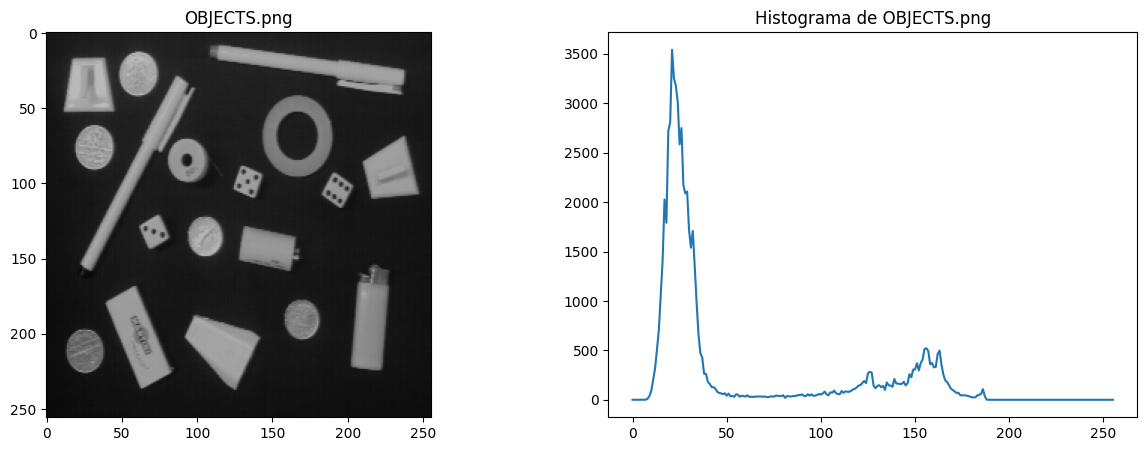

In [ ]:
# Carga de OBJECTS.png
objects = cv2.imread('images/OBJECTS.png', cv2.IMREAD_GRAYSCALE)

# Histograma de OBJECTS.png
objects_hist = cv2.calcHist([objects], [0], None, [256], [0, 256])

# Visualización de OBJECTS.png y su respectivo histograma
fig_objects, ax_objects = plt.subplots(1, 2, figsize=(15, 5))
ax_objects[0].imshow(objects, cmap='gray', vmin= 0, vmax= 255)
ax_objects[0].set_title('OBJECTS.png')
ax_objects[1].plot(objects_hist)
ax_objects[1].set_title('Histograma de OBJECTS.png')
plt.show()

### **Umbralización global**

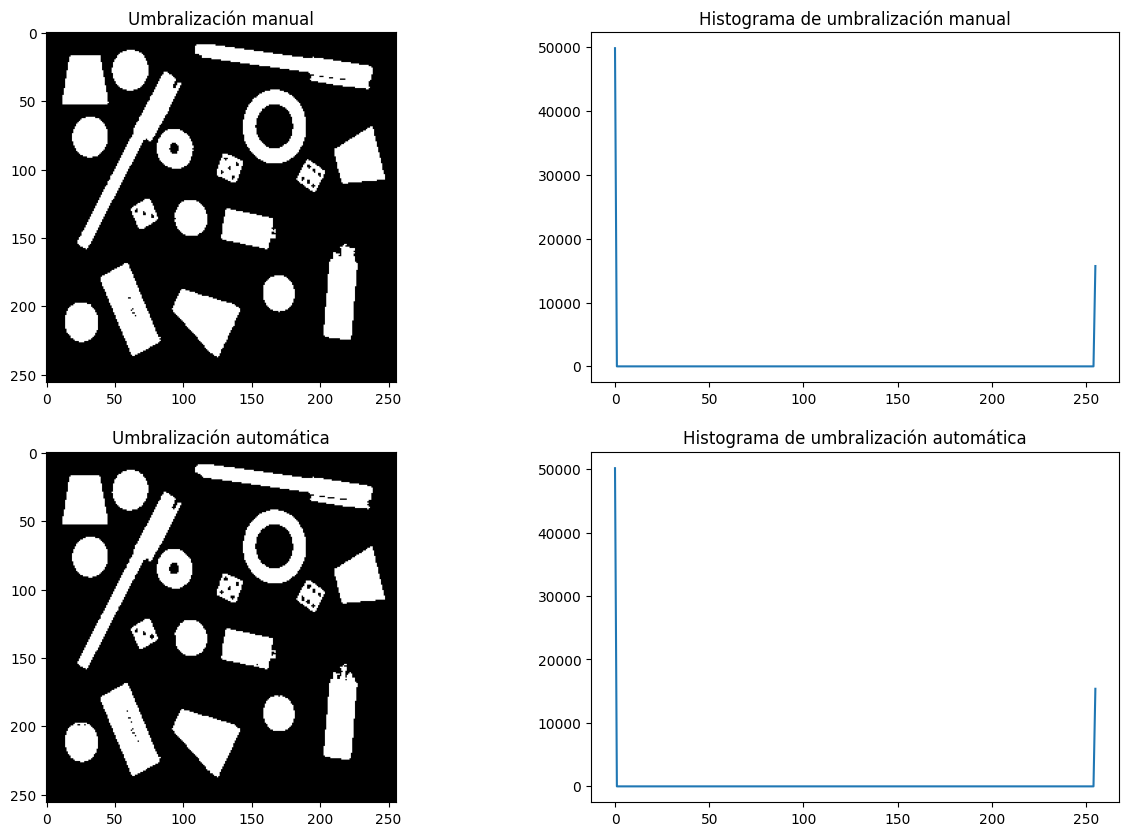

In [ ]:
# Establecer valor máximo
max_value = 255

# Establecer el umbral
thres = 75

# Binary thres - umbral manual
thres_value, thres_image = cv2.threshold(objects, thres, max_value, cv2.THRESH_BINARY)
thres_hist = cv2.calcHist([thres_image], [0], None, [256], [0, 256])

# Otsu thres - umbral automática
thres_value_otsu, thres_image_otsu = cv2.threshold(objects, 0, max_value, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
thres_otsu_hist = cv2.calcHist([thres_image_otsu], [0], None, [256], [0, 256])

# Visualización por curiosidad de cada umbralización
fig_thres, ax_thres = plt.subplots(2, 2, figsize=(15, 10))
ax_thres[0, 0].imshow(thres_image, cmap='gray', vmin= 0, vmax= 255)
ax_thres[0, 0].set_title('Umbralización manual')
ax_thres[0, 1].plot(thres_hist)
ax_thres[0, 1].set_title('Histograma de umbralización manual')
ax_thres[1, 0].imshow(thres_image_otsu, cmap='gray', vmin= 0, vmax= 255)
ax_thres[1, 0].set_title('Umbralización automática')
ax_thres[1, 1].plot(thres_otsu_hist)
ax_thres[1, 1].set_title('Histograma de umbralización automática')

plt.show()

**NOTA**

Dado que el histograma original presenta picos muy definidos y un valle profundo por la distinción entre los niveles de gris 50 y 100, la umbralización es bastante útil al separar los objetos del fondo.

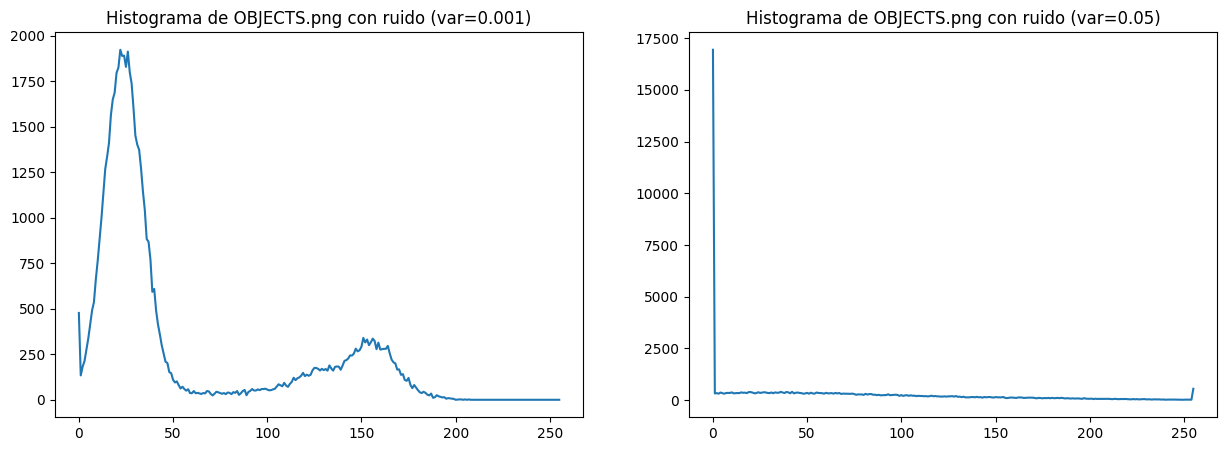

In [ ]:
# Introducir ruido gaussiano aditivo
from skimage.util import random_noise

# Varianzas a probar
var1= 0.001
var2= 0.05

# Imagenes con ruido
noised_objects = random_noise(objects, mode='gaussian', mean=0, var=var1)
noised_objects2 = random_noise(objects, mode='gaussian', mean=0, var=var2)

noised_objects = (noised_objects * 255).astype(np.uint8)
noised_objects2 = (noised_objects2 * 255).astype(np.uint8)

# Histogramas con ruido
noised_hist = cv2.calcHist([noised_objects], [0], None, [256], [0, 256])
noised_hist2 = cv2.calcHist([noised_objects2], [0], None, [256], [0, 256])

# Visualización de histogramas
fig_noise, ax_noise = plt.subplots(1, 2, figsize=(15, 5))
ax_noise[0].plot(noised_hist)
ax_noise[0].set_title('Histograma de OBJECTS.png con ruido (var=0.001)')
ax_noise[1].plot(noised_hist2)
ax_noise[1].set_title('Histograma de OBJECTS.png con ruido (var=0.05)')
plt.show()


**¿Qué sucede? ¿Por qué sucede esto?**

Al introducir ruido gaussiano, la estructura original del histograma se degrada de la siguiente manera:

* Varianza de 0.001: Los picos comienzan a ensancharse, pero la bimodalidad sigue siendo bastante clara. Además, el valle se eleva ligeramente debido a que el ruido "empuja" algunos píxeles hacia intensidades que antes no existían en esa zona.

* Varianza de 0.05: El cambio es bastante notorio porque la distinción entre el fondo y los objetos ha desaparcido, a tal punto que ahora se solapan casi por completo. De hecho, el valle ha desaparecido y el histograma parece un solo objeto continuo.

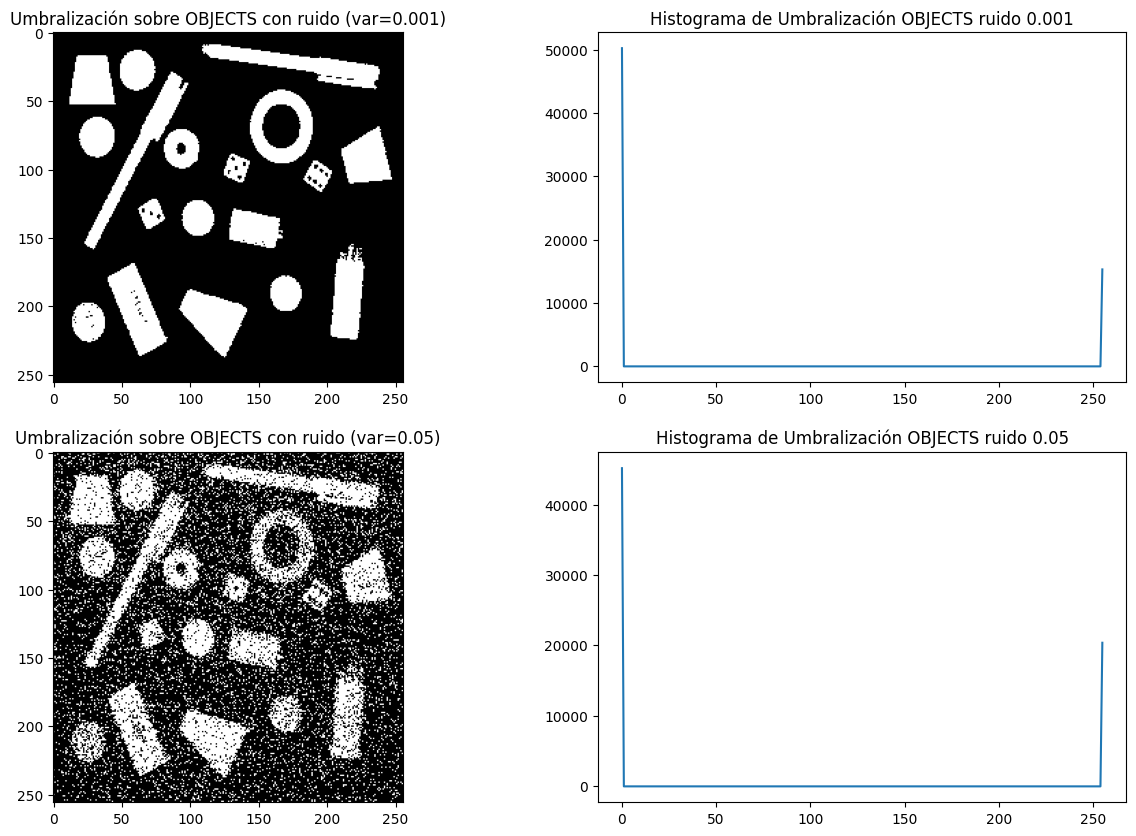

In [ ]:
# Umbralización en imagenes con ruido
thres_value_noise, thres_objects = cv2.threshold(noised_objects, thres, max_value, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
thres_value_noise2, thres_objects2 = cv2.threshold(noised_objects2, thres, max_value, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Histogramas de imagenes con ruido umbralizadas
thres_noise_hist = cv2.calcHist([thres_objects], [0], None, [256], [0, 256])
thres_noise_hist2 = cv2.calcHist([thres_objects2], [0], None, [256], [0, 256])

# Visualización de imagenes con ruido umbralizadas
fig_noise_thres, ax_noise_thres = plt.subplots(2, 2, figsize=(15, 10))
ax_noise_thres[0, 0].imshow(thres_objects, cmap='gray', vmin= 0, vmax= 255)
ax_noise_thres[0, 0].set_title('Umbralización sobre OBJECTS con ruido (var=0.001)')
ax_noise_thres[0, 1].plot(thres_noise_hist)
ax_noise_thres[0, 1].set_title('Histograma de Umbralización OBJECTS ruido 0.001')
ax_noise_thres[1, 0].imshow(thres_objects2, cmap='gray', vmin= 0, vmax= 255)
ax_noise_thres[1, 0].set_title('Umbralización sobre OBJECTS con ruido (var=0.05)')
ax_noise_thres[1, 1].plot(thres_noise_hist2)
ax_noise_thres[1, 1].set_title('Histograma de Umbralización OBJECTS ruido 0.05')
plt.show()


**¿Cómo afecta el ruido al resultado?**

El ruido gaussiano actúa como un factor de degradación que reduce la relación señal-ruido de la imagen. Mientras que la umbralización es robusta ante niveles bajos de ruido (var=0.001), niveles altos (var=0.05) invalidan el uso de umbrales globales al eliminar la separabilidad de las clases en el histograma, generando una segmentación contaminada por ruido de tipo sal y pimienta que requiere técnicas de pre-procesamiento (filtrado) para ser corregida

### **Uso de la imagen TEXT.png**

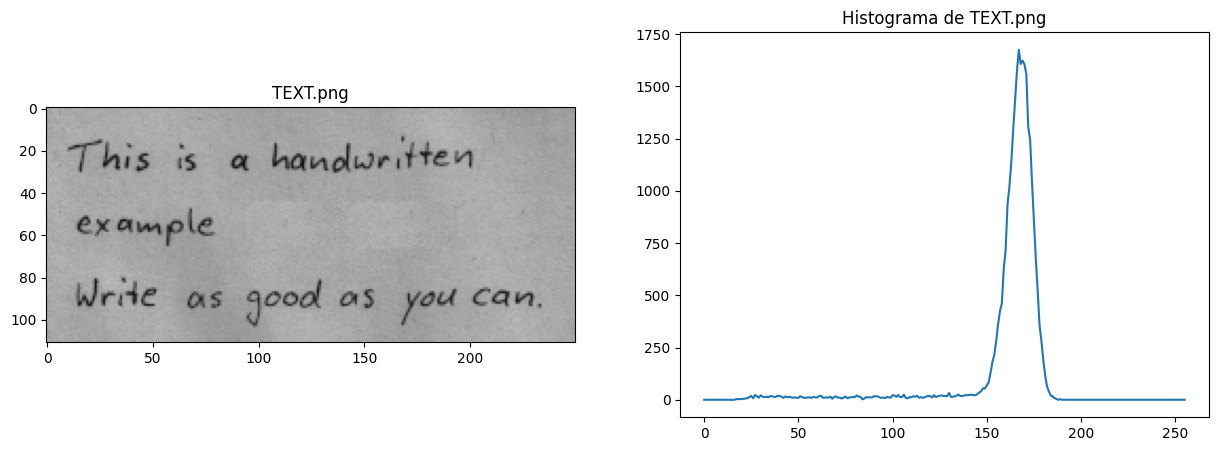

In [ ]:
# Carga de la TEXT.png
text = cv2.imread('images/TEXT.png', cv2.IMREAD_GRAYSCALE)

# Histograma de TEXT.png
text_hist = cv2.calcHist([text], [0], None, [256], [0, 256])

# Visualización de TEXT.png y su histograma
fig_text, ax_text = plt.subplots(1, 2, figsize=(15, 5))
ax_text[0].imshow(text, cmap='gray', vmin= 0, vmax= 255)
ax_text[0].set_title('TEXT.png')
ax_text[1].plot(text_hist)
ax_text[1].set_title('Histograma de TEXT.png')
plt.show()

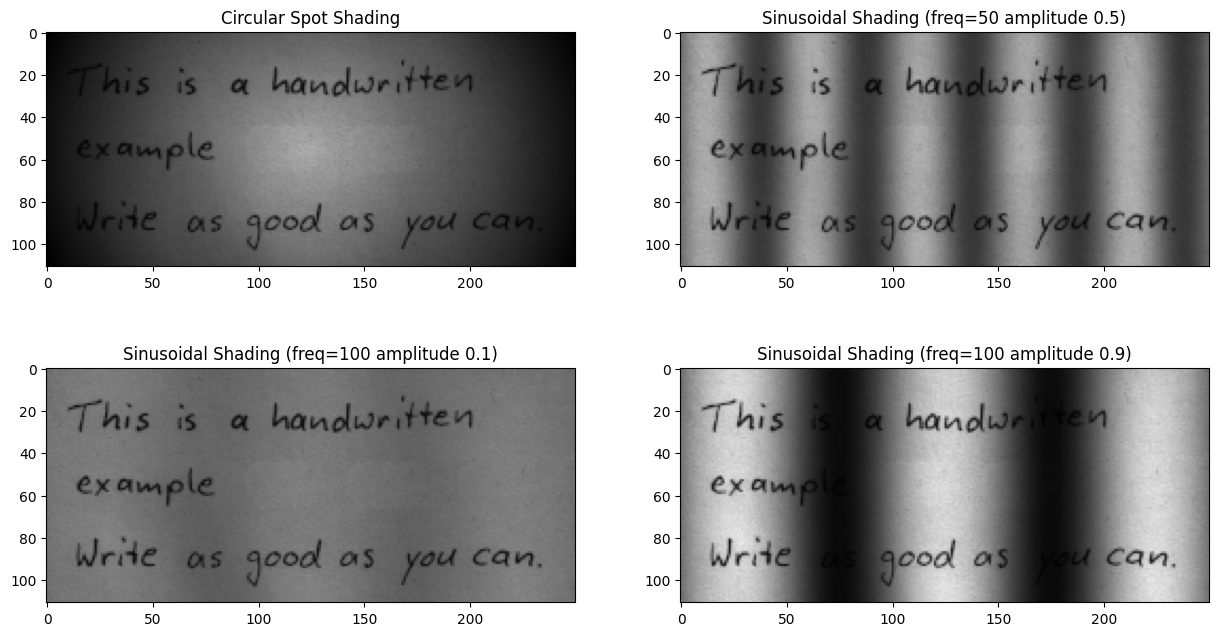

In [ ]:
#--Introducción de sombras circulares--
rows, cols = text.shape
x, y = np.meshgrid(np.arange(cols), np.arange(rows))
#Cálculo del centro
cx, cy = cols // 2, rows // 2
#Cálculo del radio y distancia posible
distance = np.sqrt((x - cx) ** 2 + (y - cy) ** 2)
max_dist = np.sqrt(cx**2 + cy**2)

#Aplicación del gradiente
spot_shading = 1 - (distance / max_dist)
spot_text = text * spot_shading

spot_text = spot_text.astype(np.uint8)

#--Introducción de sombras sinusoidales--
def sobraSinoidal(image, frequency, amplitude):
    #Cálculo y aplicación del efecto
    sinusoidal_shading = (1 + amplitude * np.sin(2 * np.pi * x / frequency)) / 1.5
    sinusoidal_image = image * sinusoidal_shading

    sinusoidal_image = sinusoidal_image.astype(np.uint8)

    return sinusoidal_image

sinusoidal_text50 = sobraSinoidal(text, frequency=50, amplitude=0.5)
sinusoidal_text100 = sobraSinoidal(text, frequency=100, amplitude=0.1)
sinusoidal_text200 = sobraSinoidal(text, frequency=100, amplitude=0.9)

#Visualización de las imágenes con sombras
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
ax[0, 0].imshow(spot_text, cmap="gray", vmin=0, vmax=255)
ax[0, 0].set_title("Circular Spot Shading")
ax[0, 1].imshow(sinusoidal_text50, cmap="gray", vmin=0, vmax=255)
ax[0, 1].set_title("Sinusoidal Shading (freq=50 amplitude 0.5)")
ax[1, 0].imshow(sinusoidal_text100, cmap="gray", vmin=0, vmax=255)
ax[1, 0].set_title("Sinusoidal Shading (freq=100 amplitude 0.1)")
ax[1, 1].imshow(sinusoidal_text200, cmap="gray", vmin=0, vmax=255)
ax[1, 1].set_title("Sinusoidal Shading (freq=100 amplitude 0.9)")
plt.show()

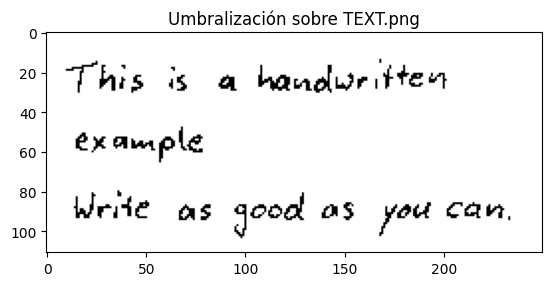

In [ ]:
# Umbralización sobre text original
thres_value_text, thres_text = cv2.threshold(text, thres, max_value, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(thres_text, cmap='gray', vmin= 0, vmax= 255)
plt.title('Umbralización sobre TEXT.png')
plt.show()

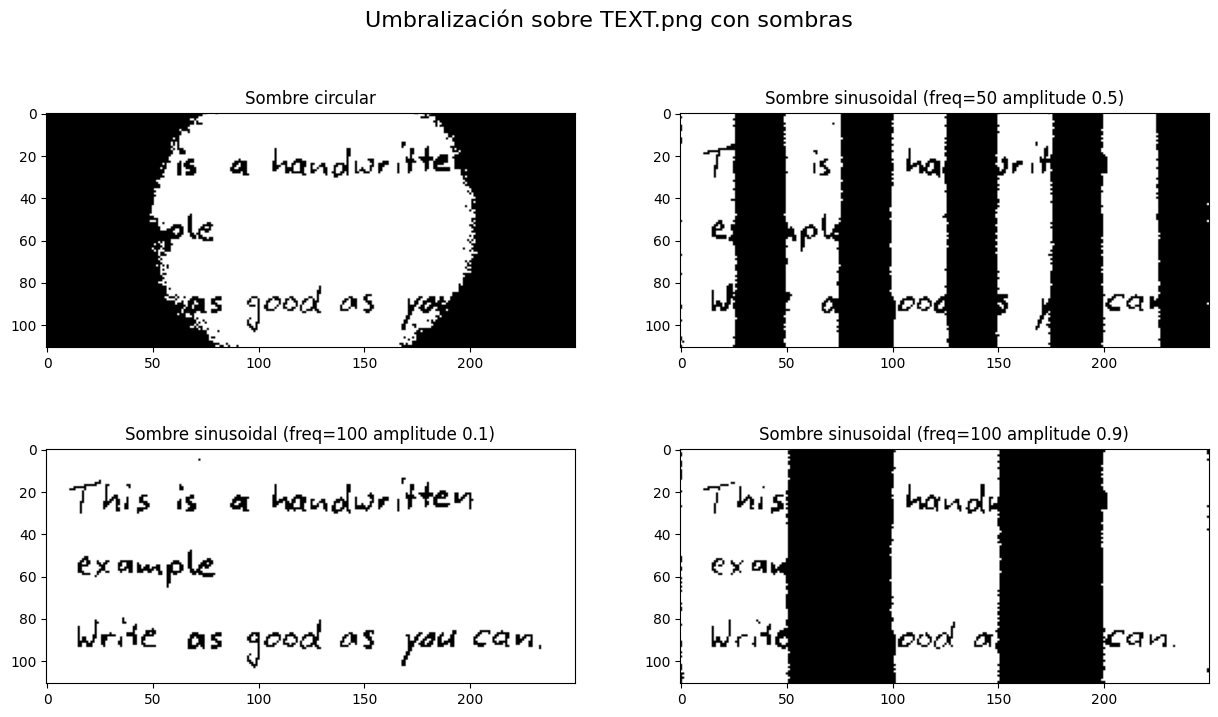

In [ ]:
# Umbralización sobre text con sombre circular
thres_value_spot, thres_spot = cv2.threshold(spot_text, thres, max_value, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Umbralización sobre text con sombre sinusoidal de 50
thres_value_sin50, thres_sin50 = cv2.threshold(sinusoidal_text50, thres, max_value, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Umbralización sobre text con sombra sinusoidal de 100
thres_value_sin100, thres_sin100 = cv2.threshold(sinusoidal_text100, thres, max_value, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Umbralización sobre text con sombra sinusoidal de 100, 0.9
thres_value_sin200, thres_sin200 = cv2.threshold(sinusoidal_text200, thres, max_value, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Visualización de resultados de umbralización con sombras
fig_thres_text, ax_thres_text = plt.subplots(2, 2, figsize=(15, 8))
ax_thres_text[0, 0].imshow(thres_spot, cmap='gray', vmin= 0, vmax= 255)
ax_thres_text[0, 0].set_title('Sombre circular')
ax_thres_text[0, 1].imshow(thres_sin50, cmap='gray', vmin= 0, vmax= 255)
ax_thres_text[0, 1].set_title('Sombre sinusoidal (freq=50 amplitude 0.5)')
ax_thres_text[1, 0].imshow(thres_sin100, cmap='gray', vmin= 0, vmax= 255)
ax_thres_text[1, 0].set_title('Sombre sinusoidal (freq=100 amplitude 0.1)')
ax_thres_text[1, 1].imshow(thres_sin200, cmap='gray', vmin= 0, vmax= 255)
ax_thres_text[1, 1].set_title('Sombre sinusoidal (freq=100 amplitude 0.9)')

fig_thres_text.suptitle('Umbralización sobre TEXT.png con sombras', fontsize=16)
plt.show()

**¿Qué sucede?**

En las zonas donde la sombra es más intensa, el algoritmo clasifica erróneamente grandes bloques de píxeles del fondo (papel) como si fueran parte del texto (negro). Ademas en zonas con mucha iluminación, el texto puede llegar a desaparecer o verse extremadamente delgado, ya que el umbral calculado es demasiado alto para esas regiones.

En adición, podemos comparar las diferentes sombras sinusoidales con amplitud. Vemos que la de 0.9 tiene mayor amplitud de la sombra, resultando en una franja negra mayor que no permite la legibilidad de la imagen.

**¿Por qué sucede esto?**

Porque Otsu asume que el histograma tiene dos picos claros (bimodal), pero al introducir sombras, el fondo ya no tiene un solo nivel de gris, sino que varía a lo largo de la imagen. Además Otsu calcula un solo valor de corte para toda la imagen y en una imagen con sombras es complejo encontrar un umbral perfecto.

**¿Qué alternativas puede emplear para mitigar este resultado?**

* Umbralización Adaptativa (Local), donde se calcula un umbral diferente para cada píxel basado en un área pequeña a su alrededor.

* Pre-procesamiento de corrección de fondo que elimine las bajas frecuencias espaciales asociadas a la iluminación.


### **Umbralización local**

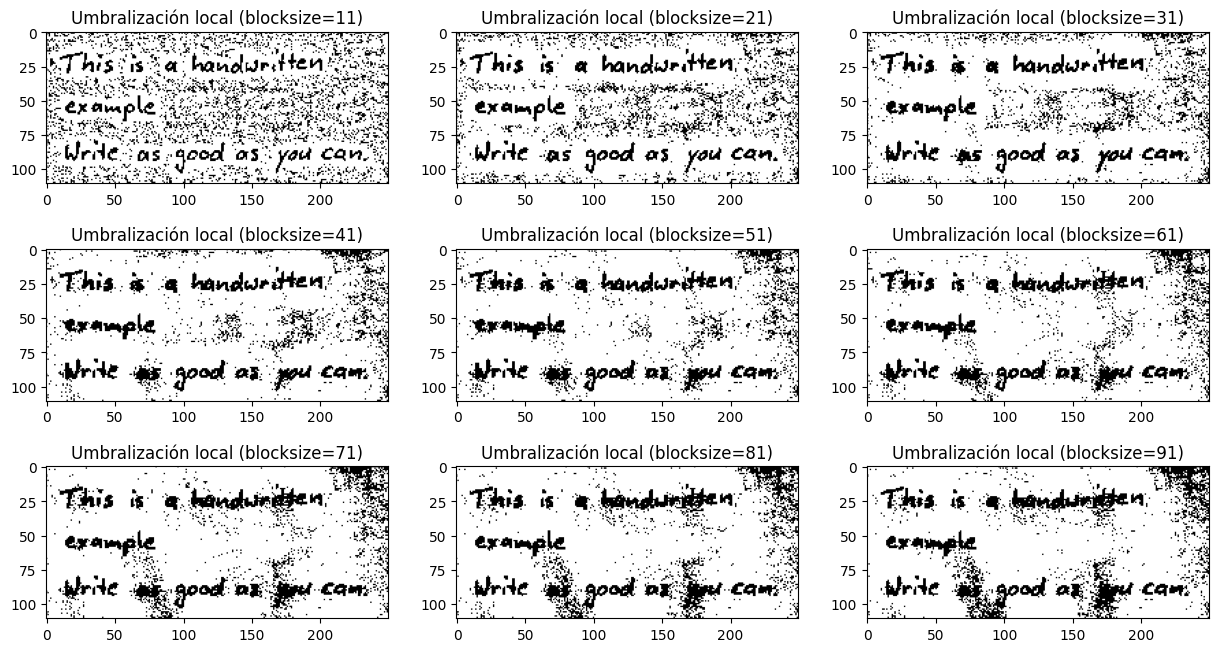

In [ ]:
# Umbralización local
from skimage.filters import threshold_local

# Aplicación de umbralización local
def local_threshold(image, blocksize):
  ti= threshold_local(image, block_size= blocksize, method='mean', offset=3)
  binary_image = image > ti
  thresholded_image = binary_image.astype(np.uint8) * 255
  return thresholded_image

# Umbralización de text.png
# NOTA: tamaño del vecindario alrededor de cada pixel debe ser impar
local_text1 = local_threshold(text, blocksize= 11)
local_text2 = local_threshold(text, blocksize= 21)
local_text3 = local_threshold(text, blocksize= 31)
local_text4 = local_threshold(text, blocksize= 41)
local_text5 = local_threshold(text, blocksize= 51)
local_text6 = local_threshold(text, blocksize= 61)
local_text7 = local_threshold(text, blocksize= 71)
local_text8 = local_threshold(text, blocksize= 81)
local_text9 = local_threshold(text, blocksize= 91)

# Visualización de umbralización local
fig_local, ax_local = plt.subplots(3, 3, figsize=(15, 8))

ax_local[0, 0].imshow(local_text1, cmap='gray', vmin= 0, vmax= 255)
ax_local[0, 0].set_title('Umbralización local (blocksize=11)')
ax_local[0, 1].imshow(local_text2, cmap='gray', vmin= 0, vmax= 255)
ax_local[0, 1].set_title('Umbralización local (blocksize=21)')
ax_local[0, 2].imshow(local_text3, cmap='gray', vmin= 0, vmax= 255)
ax_local[0, 2].set_title('Umbralización local (blocksize=31)')
ax_local[1, 0].imshow(local_text4, cmap='gray', vmin= 0, vmax= 255)
ax_local[1, 0].set_title('Umbralización local (blocksize=41)')
ax_local[1, 1].imshow(local_text5, cmap='gray', vmin= 0, vmax= 255)
ax_local[1, 1].set_title('Umbralización local (blocksize=51)')
ax_local[1, 2].imshow(local_text6, cmap='gray', vmin= 0, vmax= 255)
ax_local[1, 2].set_title('Umbralización local (blocksize=61)')
ax_local[2, 0].imshow(local_text7, cmap='gray', vmin= 0, vmax= 255)
ax_local[2, 0].set_title('Umbralización local (blocksize=71)')
ax_local[2, 1].imshow(local_text8, cmap='gray', vmin= 0, vmax= 255)
ax_local[2, 1].set_title('Umbralización local (blocksize=81)')
ax_local[2, 2].imshow(local_text9, cmap='gray', vmin= 0, vmax= 255)
ax_local[2, 2].set_title('Umbralización local (blocksize=91)')
plt.show()

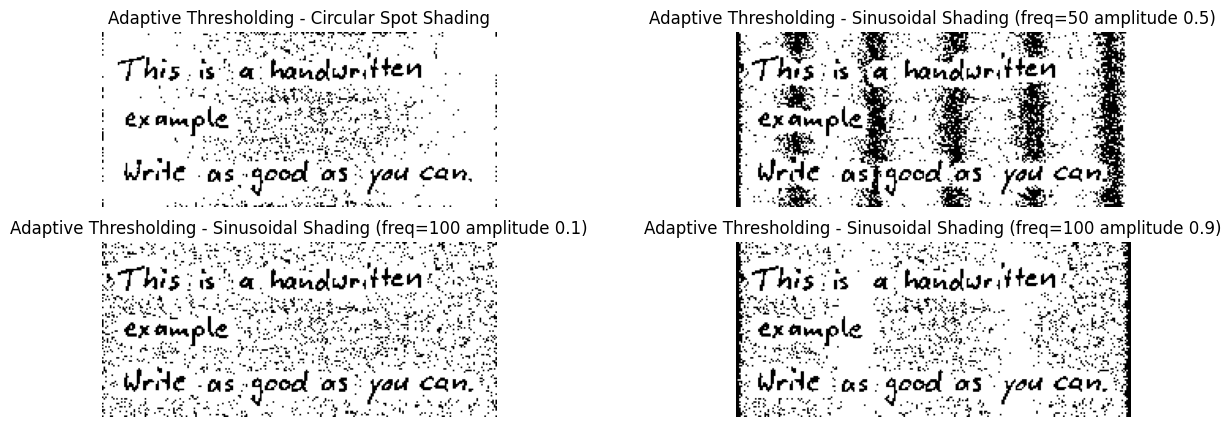

In [ ]:
# Umbralizacion local para imagenes con sombras
thresholded_spot = local_threshold(spot_text, blocksize= 11)
thresholded_sin50 = local_threshold(sinusoidal_text50, blocksize= 11)
thresholded_sin100 = local_threshold(sinusoidal_text100, blocksize= 11)
thresholded_sin200 = local_threshold(sinusoidal_text200, blocksize= 11)

# Visualización de umbralización local para sombras
fig_local_spot, ax_local_spot = plt.subplots(2, 2, figsize=(15, 5))
ax_local_spot[0, 0].imshow(thresholded_spot, cmap="gray", vmin=0, vmax=255)
ax_local_spot[0, 0].set_title("Adaptive Thresholding - Circular Spot Shading")
ax_local_spot[0, 0].axis('off')
ax_local_spot[0, 1].imshow(thresholded_sin50, cmap="gray", vmin=0, vmax=255)
ax_local_spot[0, 1].set_title("Adaptive Thresholding - Sinusoidal Shading (freq=50 amplitude 0.5)")
ax_local_spot[0, 1].axis('off')
ax_local_spot[1, 0].imshow(thresholded_sin100, cmap="gray", vmin=0, vmax=255)
ax_local_spot[1, 0].set_title("Adaptive Thresholding - Sinusoidal Shading (freq=100 amplitude 0.1)")
ax_local_spot[1, 0].axis('off')
ax_local_spot[1, 1].imshow(thresholded_sin200, cmap="gray", vmin=0, vmax=255)
ax_local_spot[1, 1].set_title("Adaptive Thresholding - Sinusoidal Shading (freq=100 amplitude 0.9)")
ax_local_spot[1, 1].axis('off')
plt.show()

**¿En qué cambia el resultado con relación al método de Otsu?**

Dado que ahora el umbral se calcula píxel a píxel basándose solo en su vecindario inmediato, ignorando si el resto de la imagen está más clara o más oscura. Con un blocksize pequeño (11 o 21), el texto aparece mucho más nítido y completo que en la versión de Otsu, donde las letras a menudo se engrosaban o desaparecían.

**¿Qué implicaciones tiene esto?**

El uso de umbralización adaptativa implica un mayor costo computacional, ya que requiere procesar vecindarios para cada píxel, a diferencia del cálculo único de Otsu. Sin embargo, es la única opción viable para digitalización de documentos o visión artificial en entornos con iluminación natural no controlada.

**¿Cómo puede mejorar el resultado de la segmentación para reducir el ruido en ambos casos?**

La mejor alternativa es el pre-procesamiento (Suavizado), es decir, se debe aplicar un filtro de Mediana o un Desfoque Gaussiano antes de la umbralización. Esto elimina las variaciones de alta frecuencia (ruido granular) que confunden al umbral local sin borrar los bordes de las letras.


# **Segmentación por crecimiento de regiones**

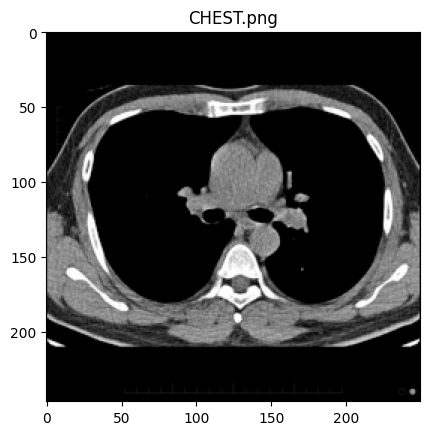

In [ ]:
# Carga de CHEST.png
chest = cv2.imread('images/CHEST.png', cv2.IMREAD_GRAYSCALE)

# Visualización de CHEST.png
plt.imshow(chest, cmap='gray', vmin= 0, vmax= 255)
plt.title('CHEST.png')
plt.show()

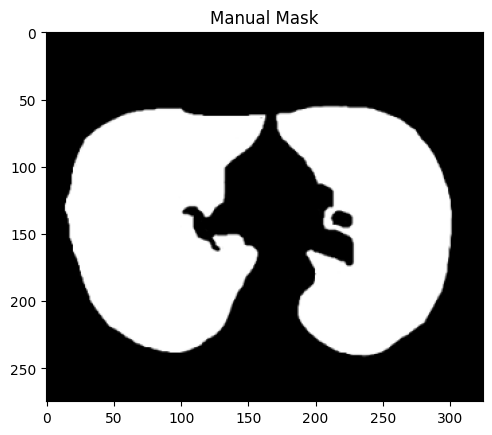

In [ ]:
#Mostrar mascara de paint
mascara_manual = cv2.imread("images/MascaraManual.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(mascara_manual, cmap="gray", vmin=0, vmax=255)
plt.title("Manual Mask")
plt.show()

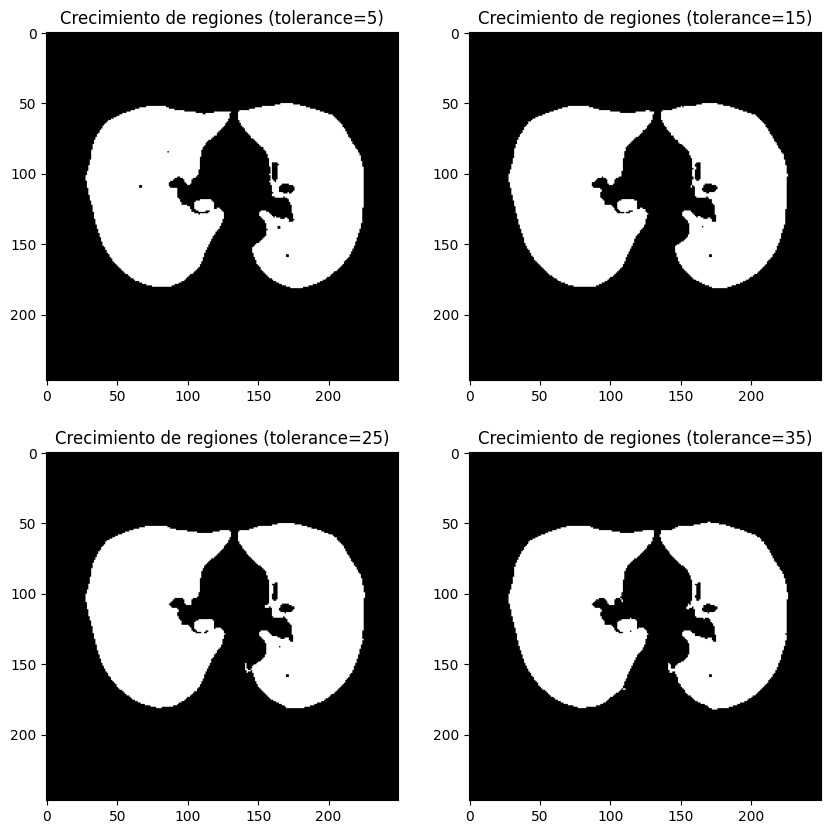

In [ ]:
# Crecimiento de regiones
from skimage.segmentation import flood

def crecimiento_regiones(image, seed1, seed2, tolerance):
    # Aplicar flood para cada semilla
    mask1 = flood(image, seed_point=seed1, tolerance=tolerance)
    mask2 = flood(image, seed_point=seed2, tolerance=tolerance)
    # Combinar las máscaras
    combined_mask = mask1 | mask2
    return combined_mask

mascara1 = crecimiento_regiones(chest, seed1=(120, 60), seed2=(120, 190), tolerance=5)
mascara2 = crecimiento_regiones(chest, seed1=(120, 60), seed2=(120, 190), tolerance=15)
mascara3 = crecimiento_regiones(chest, seed1=(120, 60), seed2=(120, 190), tolerance=25)
mascara4 = crecimiento_regiones(chest, seed1=(120, 60), seed2=(120, 190), tolerance=35)

# Visualización de crecimiento por regiones
fig_regiones, ax_regiones = plt.subplots(2, 2, figsize=(10, 10))
ax_regiones[0, 0].imshow(mascara1, cmap='gray')
ax_regiones[0, 0].set_title('Crecimiento de regiones (tolerance=5)')
ax_regiones[0, 1].imshow(mascara2, cmap='gray')
ax_regiones[0, 1].set_title('Crecimiento de regiones (tolerance=15)')
ax_regiones[1, 0].imshow(mascara3, cmap='gray')
ax_regiones[1, 0].set_title('Crecimiento de regiones (tolerance=25)')
ax_regiones[1, 1].imshow(mascara4, cmap='gray')
ax_regiones[1, 1].set_title('Crecimiento de regiones (tolerance=35)')
plt.show()

**¿Cómo se puede determinar cualitativamente dos regiones?**

Las regiones se separan por su nivel de gris, los pulmones se identifican como las áreas de baja densidad (oscuras) debido a la presencia de aire, contrastando con el corazón y las costillas que son más claros. Además, las semillas aseguran que el algoritmo solo crezca dentro de la cavidad pulmonar y no "salte" a otras áreas oscuras fuera del torso.

**¿Cuál segmentación tiene mejor calidad?**

El algoritmo ofrece una mayor fidelidad en la definición de las fronteras pulmonares, siempre que se seleccione una tolerancia adecuada (aprox. 25) que permita ignorar el ruido interno sin desbordar los límites del órgano. Además, esta proporciona contornos más precisos y resultados reproducibles bajo criterios estadísticos de vecindad.

### **Coeficiente de Sorensen-Dice**

In [ ]:
#Funcion para recortar la mascara al tamaño de chest (ya que la mascara es mas grande y no se pueden comparar directamente)
def center_crop(img, target_shape):
    th, tw = target_shape
    h, w = img.shape[:2]
    r0 = (h - th) // 2
    c0 = (w - tw) // 2
    return img[r0:r0+th, c0:c0+tw]

# binariza manual (por si viene 0/255)
manual_bin = (mascara_manual > 0)
# recorta al tamaño de chest
manual_crop = center_crop(manual_bin, chest.shape)
print("chest:", chest.shape, "manual_crop:", manual_crop.shape)

chest: (247, 250) manual_crop: (247, 250)


In [ ]:
def sorensen_dice(mask1, mask2):
    A = mask1.astype(bool)
    B = mask2.astype(bool)
    inter = np.logical_and(A, B).sum()
    denom = A.sum() + B.sum()
    return (2.0 * inter / denom) if denom != 0 else 1.0

dice = sorensen_dice(mascara1, manual_crop)  # mascara = la automática (flood)
print(f"Dice entre mascara1 (tolerancia 5) y mascara manual:", dice)

dice2 = sorensen_dice(mascara2, manual_crop)  # mascara = la automática (flood)
print(f"Dice entre mascara2 (tolerancia 15) y mascara manual:", dice2)

dice3 = sorensen_dice(mascara3, manual_crop)  # mascara = la automática (flood)
print(f"Dice entre mascara3 (tolerancia 30) y mascara manual:", dice3)

dice4 = sorensen_dice(mascara4, manual_crop)  # mascara = la automática (flood)
print(f"Dice entre mascara4 (tolerancia 40) y mascara manual:", dice4)

Dice entre mascara1 (tolerancia 5) y mascara manual: 0.571948124612833
Dice entre mascara2 (tolerancia 15) y mascara manual: 0.5732555128383897
Dice entre mascara3 (tolerancia 30) y mascara manual: 0.5744152308273217
Dice entre mascara4 (tolerancia 40) y mascara manual: 0.5756950779359854


**¿Cómo puede interpretar el resultado?**

Los valores de Dice obtenidos 0.57 en todos los casos indican una similitud moderada entre la segmentación automática y la máscara manual, pero lejos de una coincidencia perfecta. Un Dice cercano a 1 implicaría una superposición casi perfecta, mientras que valores alrededor de 0.5–0.6 reflejan que existe una cantidad considerable de píxeles que no coinciden entre ambas segmentaciones

**¿Respalda el análisis cualitativo el valor obtenido?**

Sí, lo respalda parcialmente. Cualitativamente se observaba que las tolerancias intermedias o altas cubrían mejor el pulmón que la tolerancia baja, pero también se notaban diferencias en bordes y pequeñas zonas de sobre o subsegmentación. El Dice confirma que ninguna segmentación automática coincide fuertemente con la manual, ya que todas se mantienen en un rango relativamente bajo y muy similar.

# **Segmentación por agrupación**

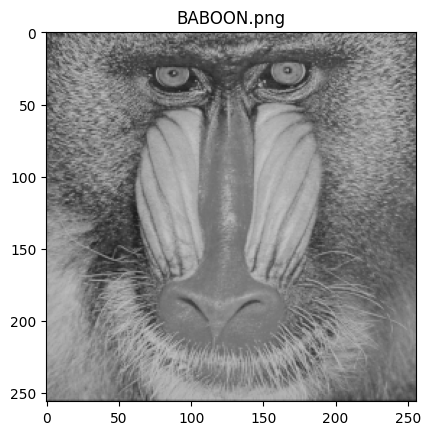


Las dimensiones NxM son: 256 x 256


In [ ]:
# Carga de BABOON.png
baboon = cv2.imread('images/BABOON.png', cv2.IMREAD_GRAYSCALE)

# Visualización de BABOON.png
plt.imshow(baboon, cmap='gray', vmin= 0, vmax= 255)
plt.title('BABOON.png')
plt.show()

# Dimensiones de BABOON.png
N, M = baboon.shape
print(f'\nLas dimensiones NxM son: {N} x {M}')

### **Clustering con k = 3**

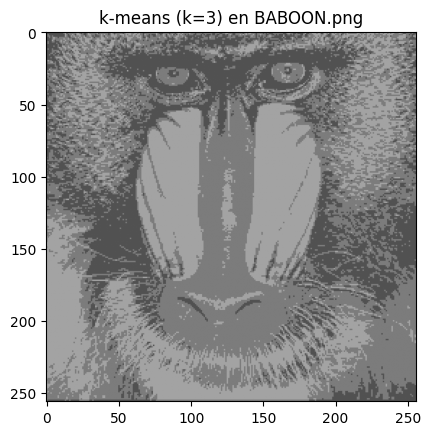

In [ ]:
# Importación de k-means
from sklearn.cluster import KMeans

baboon_flat = baboon.reshape(N*M, 1)

# Aplicación de k-means con 3 clusters
model_kmeans = KMeans(n_clusters= 3, n_init=10)
model_kmeans.fit(baboon_flat)

# 1. Obtener los centros (niveles de gris promedio de cada grupo)
centers = np.uint8(model_kmeans.cluster_centers_)

# 2. Obtener las etiquetas
labels = model_kmeans.labels_

# 3. RECONSTRUCCIÓN: Asignar a cada etiqueta su valor de centro
# Esto convierte los valores 0, 1, 2 en los grises reales (ej. 50, 130, 210)
baboon_recovered = centers[labels].reshape(N, M)

# Visualización de resultados
plt.imshow(baboon_recovered, cmap='gray', vmin= 0, vmax= 255)
plt.title('k-means (k=3) en BABOON.png')
plt.show()

### **Método del codo**

In [ ]:
# Método del codo con inertia
inertia = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
  kmeans.fit(baboon_flat)
  inertia.append(kmeans.inertia_)

print('La inercia de k desde 1 hasta 10: ')

for i, val in enumerate(inertia):
  print(f'k={i+1}: {val:.2f}')


La inercia de k desde 1 hasta 10: 
k=1: 67033448.83
k=2: 22489351.28
k=3: 9869320.59
k=4: 6165156.74
k=5: 3932538.81
k=6: 2798255.25
k=7: 2135668.64
k=8: 1694854.70
k=9: 1356853.07
k=10: 1113472.19


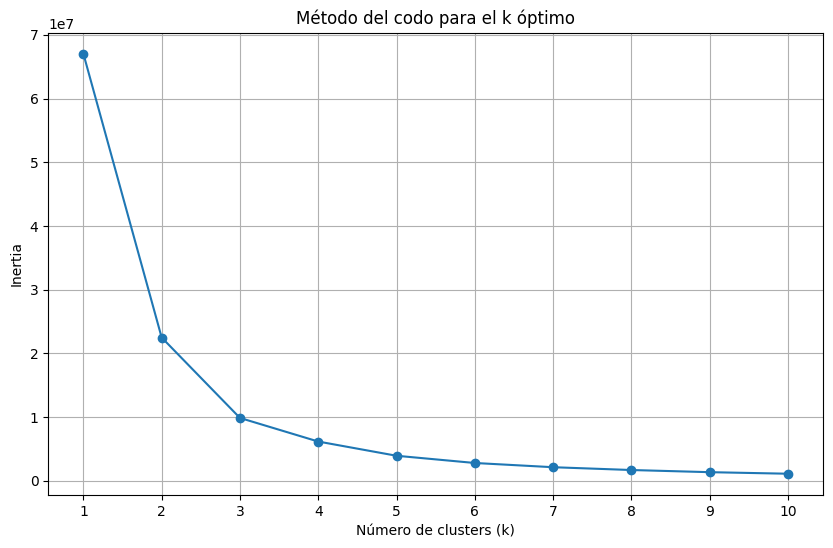

In [ ]:
# Visualización del método de codos
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del codo para el k óptimo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

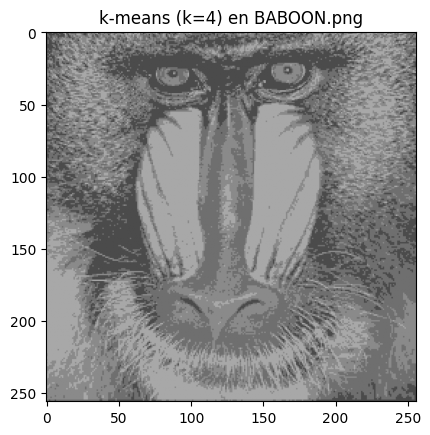

In [ ]:
# Clustering con k= 4 dado el método del codo
k_opt = 4
model_kmeans4 = KMeans(n_clusters= k_opt, n_init= 10)
model_kmeans4.fit(baboon_flat)

centers4 = np.uint(model_kmeans4.cluster_centers_)
labels4 = model_kmeans4.labels_

baboon_recovered4 = centers4[labels4].reshape(N, M)

# Visualización de resultados k=4
plt.imshow(baboon_recovered4, cmap='gray', vmin= 0, vmax= 255)
plt.title('k-means (k=4) en BABOON.png')
plt.show()

*¿Cómo cambia la segmentación?*

 Al comparar $k=3$ frente a $k=4$ vemos que el método del codo sirve bastante bien para encontrar el punto de equilibrio que minimiza la inercia sin sobresegmentar la imagen. Derivando que el mejor k es el 4 al ofrecer una representación más fiel de las texturas ramificadas del baboon, permitiendo una mejor separación entre el pelaje y las estructuras faciales.

* $k=3$: La imagen se simplifica en tres grandes regiones: sombras profundas, tonos medios y brillos destacados. Sin embargo, se agrupan texturas del pelaje con sombras del fondo, perdiendo matices importantes en las zonas de transición.

* $k=4$: Al añadir un cuarto grupo, el algoritmo logra separar una categoría adicional de grises. Lo cual permite que el pelaje gane mayor volumen y que los detalles finos alrededor de los ojos y la nariz se vuelvan más nítidos.

### **Segmentación por súper-pixeles (SLIC)**

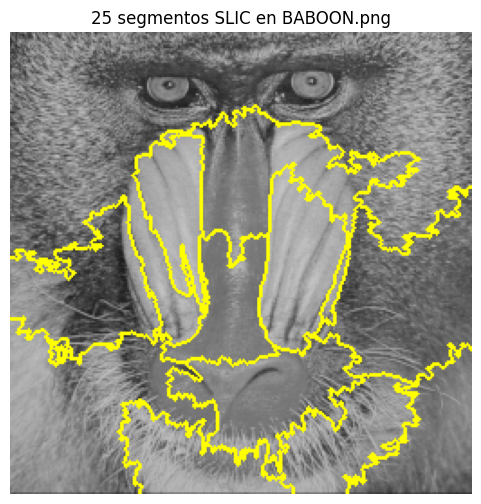


Superpixeles encontrados para 25 sp: 12


In [ ]:
# Importación de segmentation
from skimage.segmentation import slic
from skimage import segmentation

# 25 Segmentos
segments_25 = slic(cv2.merge([baboon, baboon, baboon]), n_segments= 25)

#Visualización de los súperpixeles superpuestos en baboon
plt.figure(figsize=(6,6))
plt.imshow(segmentation.mark_boundaries(baboon, segments_25))
plt.title('25 segmentos SLIC en BABOON.png')
plt.axis('off')
plt.show()

# Número de pixeles encontrados
num_superpix = len(np.unique(segments_25))
print(f'\nSuperpixeles encontrados para 25 sp: {num_superpix}')

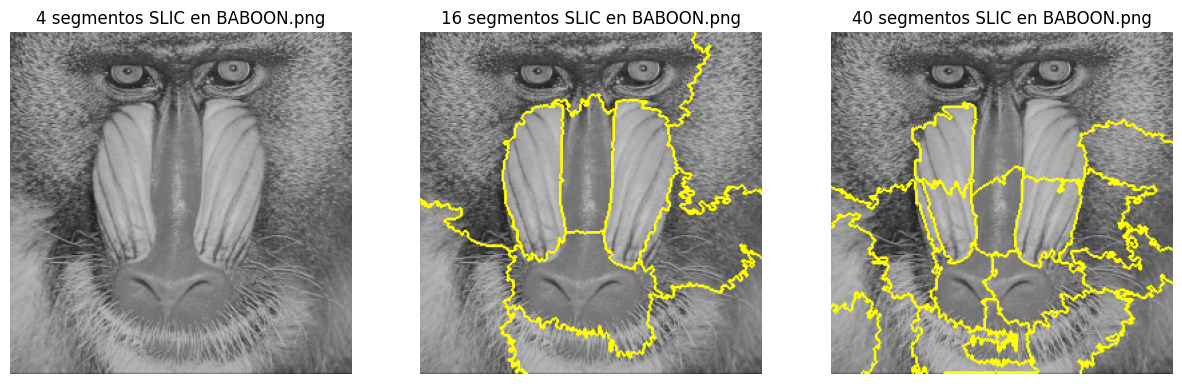


Superpixeles encontrados para 4 sp: 1

Superpixeles encontrados para 16 sp: 9

Superpixeles encontrados para 40 sp: 17


In [ ]:
# k= 4 Segmentos
segments_4 = slic(cv2.merge([baboon, baboon, baboon]), n_segments= k_opt)

# k= 16 Segmentos
segments_16 = slic(cv2.merge([baboon, baboon, baboon]), n_segments= k_opt*4)

# k= 40 Segmentos
segments_40 = slic(cv2.merge([baboon, baboon, baboon]), n_segments= k_opt*10)

#Visualización de los súperpixeles superpuestos en baboon
fig_sp, ax_sp = plt.subplots(1, 3, figsize=(15, 5))
ax_sp[0].imshow(segmentation.mark_boundaries(baboon, segments_4))
ax_sp[0].set_title('4 segmentos SLIC en BABOON.png') ; ax_sp[0].axis('off')
ax_sp[1].imshow(segmentation.mark_boundaries(baboon, segments_16))
ax_sp[1].set_title('16 segmentos SLIC en BABOON.png') ; ax_sp[1].axis('off')
ax_sp[2].imshow(segmentation.mark_boundaries(baboon, segments_40))
ax_sp[2].set_title('40 segmentos SLIC en BABOON.png') ; ax_sp[2].axis('off')
plt.show()


# Número de pixeles encontrados
num_superpix4 = len(np.unique(segments_4))
num_superpix16 = len(np.unique(segments_16))
num_superpix40 = len(np.unique(segments_40))
print(f'\nSuperpixeles encontrados para 4 sp: {num_superpix4}')
print(f'\nSuperpixeles encontrados para 16 sp: {num_superpix16}')
print(f'\nSuperpixeles encontrados para 40 sp: {num_superpix40}')

**Qué puede observar? ¿Qué diferencias hay entre las imágenes generadas?**

Al variar el número de segmentos (K) en el algoritmo SLIC, se observan cambios drásticos en la capacidad de la imagen para representar estructuras:

* Baja resolución de segmentos (K=4): Con un valor tan bajo, el algoritmo apenas logra encontrar 1 superpíxel significativo. La imagen se ve prácticamente original porque los parámetros de cercanía no permiten subdividir el rostro del baboon de forma coherente.

* Resolución Media (K=16 y K=25): Los superpíxeles empiezan a rodear áreas anatómicas clave, como los ojos o la nariz. Sin embargo, con 25 se encuentran 12, y con 16 sólo 9 porque el algoritmo SLIC intenta mantener los segmentos compactos y, si la textura es muy compleja, "fusiona" regiones para evitar fragmentaciones sin sentido.

* Alta resolución (K=40): Es la segmentación más detallada, encontrando 17 superpíxeles. Las fronteras amarillas ahora siguen mucho mejor las texturas ramificadas del pelaje y las arrugas faciales.

### **Conclusiones de Segmentación por Agrupación**

**¿Cuál es la diferencia entre las dos técnicas de segmentación por agrupación utilizadas?**

Los criterios de agrupación son diferentes porque KMeans solo utiliza la intensidad de gris (valor del píxel), y SLIC utiliza esa misma intensidad + posición espacial (x,y).

En el caso de KMeans, la ubicación NO importa porque los píxeles en esquinas opuestas pueden ser del mismo grupo si tienen el mismo tono. En cambio, SLIC fuerza que los píxeles del grupo estén físicamente cerca, creando regiones compactas.

Finalmente, los resultados visuales se diferencian porque en KMeans hay imagen con ""menos colores"" y en SLIC hay una malla de polígonos que envuelve las formas de la imagen.

**¿Cuál presenta el mejor resultado?**

Realmente depende de lo que estemos buscando. Es mejor KMeans para identificar cuántos niveles de gris principales existen (separar fondo, pelaje y piel clara), pero es mejor SLIC par extraer la forma de un objeto ramificado o complejo.

**Conclusión general**

Se concluye que K-means es una técnica de cuantización de color que segmenta la imagen basándose en la estadística global de intensidades, siendo ideal para simplificar la paleta tonal. Por el contrario, SLIC funciona como un precursor para la extracción de objetos, ya que su restricción espacial genera superpíxeles que preservan la topología y los bordes críticos de la imagen. En este taller, mientras que el método del codo nos dio el número óptimo de tonos con K-means ($k=4$), SLIC permitió una subdivisión estructural más detallada al aumentar el número de segmentos, facilitando la identificación de regiones complejas como los ojos y las arrugas nasales del espécimen.

# **Ejercicio de síntesis taller 3**

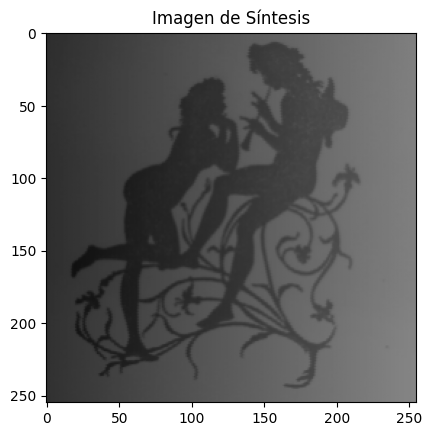

In [ ]:
# Carga de imagen sintesis
sintesis = cv2.imread("images/SINTESIS3.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(sintesis, cmap="gray", vmin=0, vmax=255)
plt.title("Imagen de Síntesis")
plt.show()

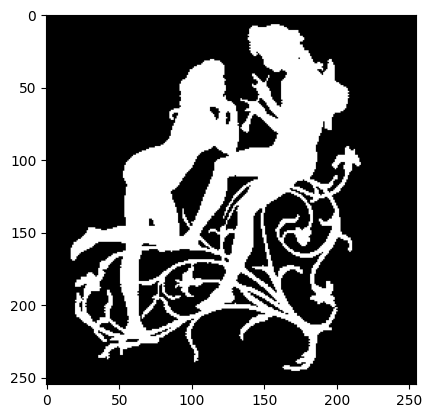

In [ ]:
# Segmentación local
local_sintesis = local_threshold(sintesis, blocksize= 121)

# Negativo
neg_local_sintesis = cv2.bitwise_not(local_sintesis)

# Crecimiento de regiones
def crecimiento_regiones1(image, seed1, tolerance):
  mask1 = flood(image, seed_point=seed1, tolerance=tolerance)
  return mask1

cre_neg_local_sintesis = crecimiento_regiones1(neg_local_sintesis,seed1= (100, 120), tolerance= 95)

# Visualización de resultados

plt.imshow(cre_neg_local_sintesis, cmap='gray')
plt.show()